In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as sio
import pandas as pd

Text(0.5, 1.0, 'Mouse Movement Over Time')

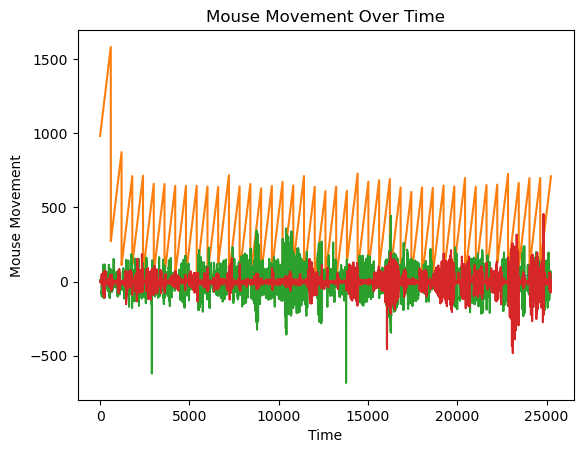

In [17]:
# load the data from the .mat file
data = sio.loadmat('/Users/tstakuma/Desktop/Rikkyo_Action_Analysis/PRJ/sample data 2/1_19-Oct-2019_10-18-23_mouse.mat')

mouseMovement = data['mouseMovement']
# extract the x and y coordinates
x = data['mouseMovement'][0]
y = data['mouseMovement'][1]

fig, ax = plt.subplots()
# Plot the mouseMovement values over time
ax.plot(range(len(mouseMovement)), mouseMovement)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Mouse Movement')
ax.set_title('Mouse Movement Over Time')

In [18]:
def traj_withColour(x, y, fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    ax.axis('equal')
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(
        cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    return fig, ax  # Corrected return statement

In [19]:
# convert mouseMovement from a 2D array to pandas dataframe
df = pd.DataFrame(mouseMovement, columns=['trial', 'sample', 'dx', 'dy'])

# add columns for x and y coordinates by cumulatively summing dx and dy. Group by trial
# df.groupby('trial')
df['x'] = df.groupby('trial')['dx'].cumsum()
df['y'] = df.groupby('trial')['dy'].cumsum()

# ungroup the dataframe
df = df.reset_index(drop=True)
df.head()

trial  sample  dx  dy   x  y
0      1     982   3  -1   3 -1
1      1     983   3  -1   6 -2
2      1     984   2  -1   8 -3
3      1     985   4  -1  12 -4
4      1     986   7  -3  19 -7

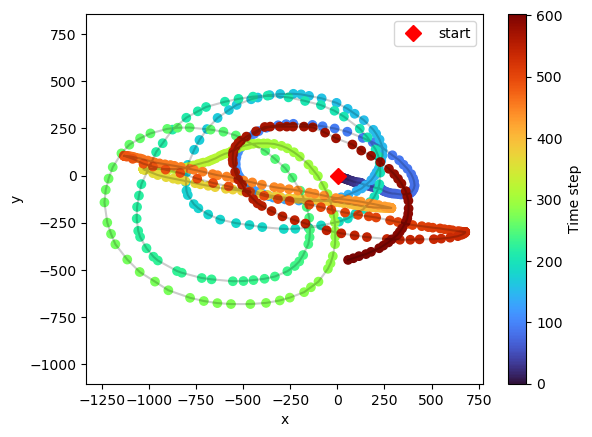

In [20]:
# plot the first trial
df_ = df[df['trial'] == 1]
x = df_[['x']].values
y = df_[['y']].values
fig, ax = traj_withColour(x, y)

/var/folders/0s/3n_h1cfj53s3hrvmsk3m0px80000gn/T/ipykernel_40640/2497745614.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


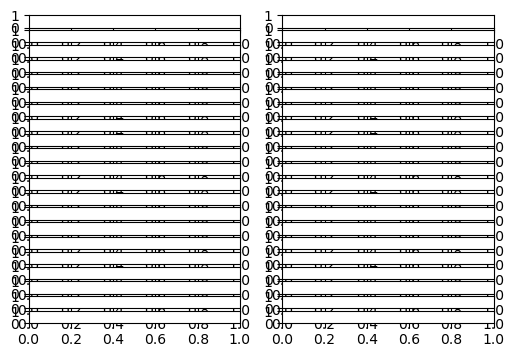

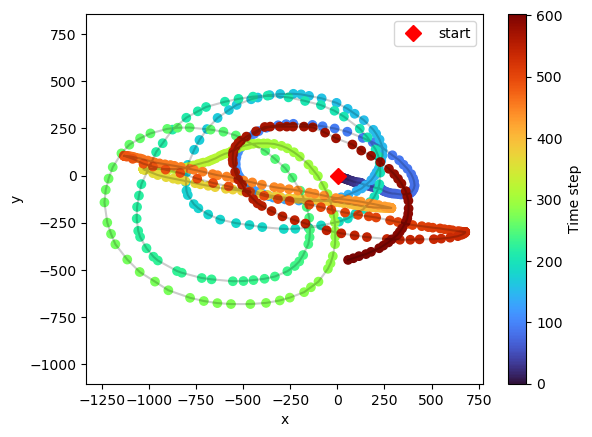

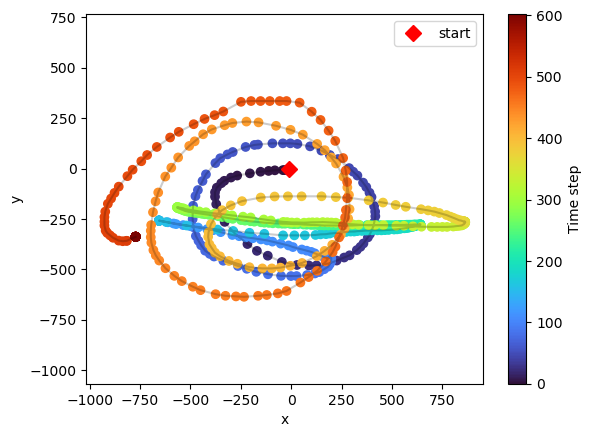

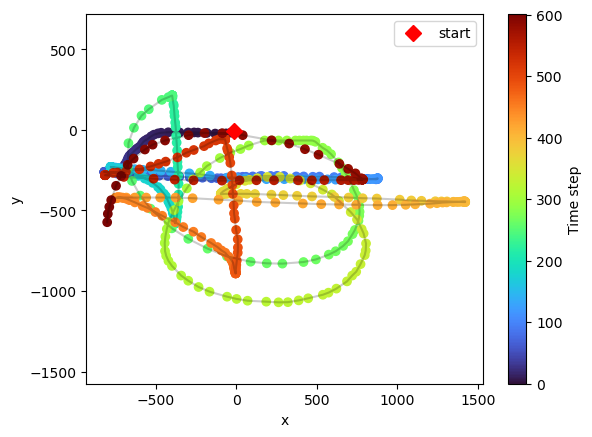

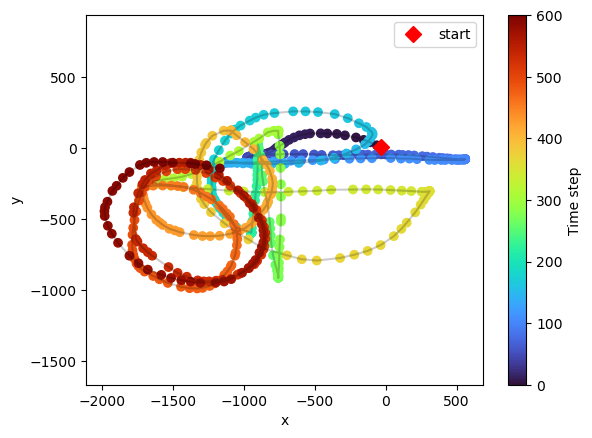

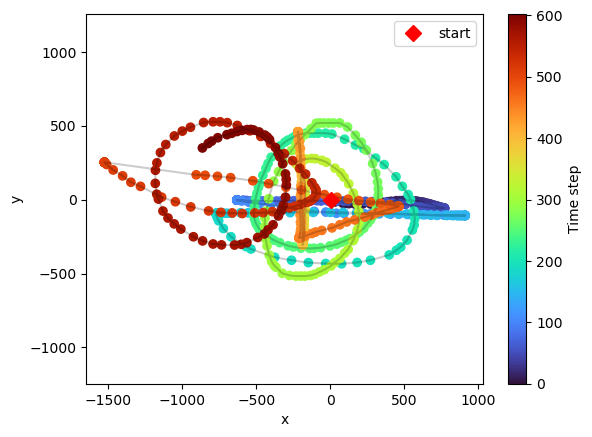

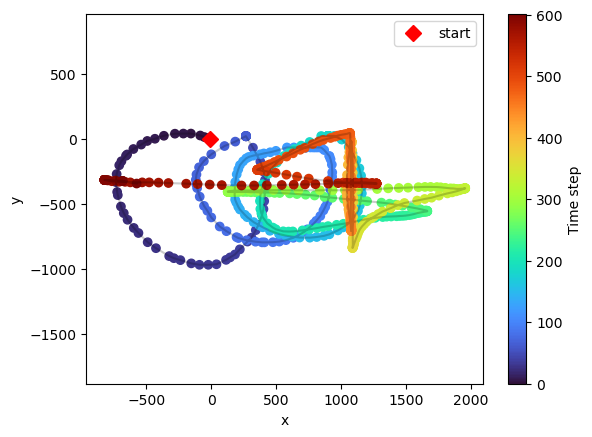

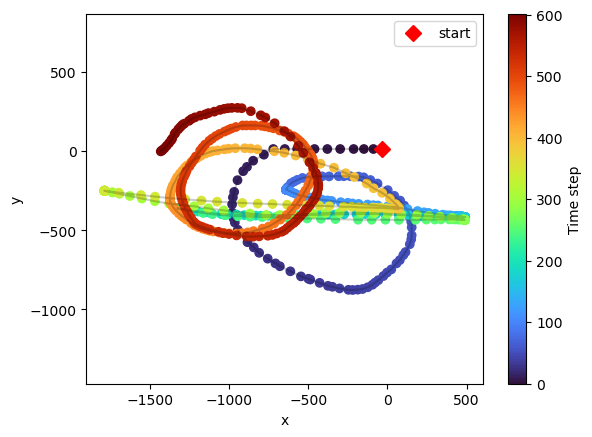

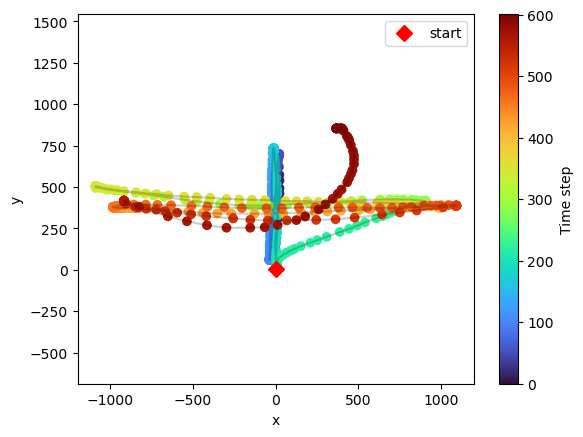

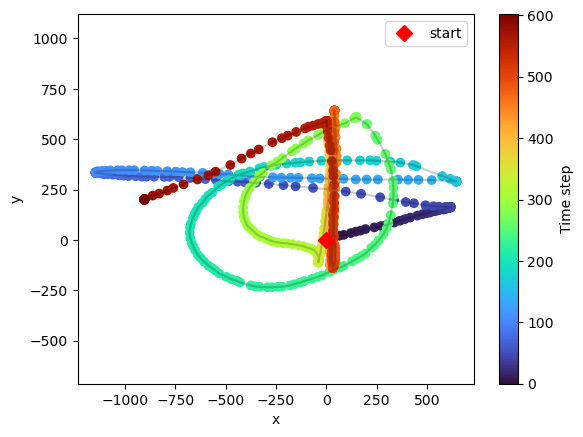

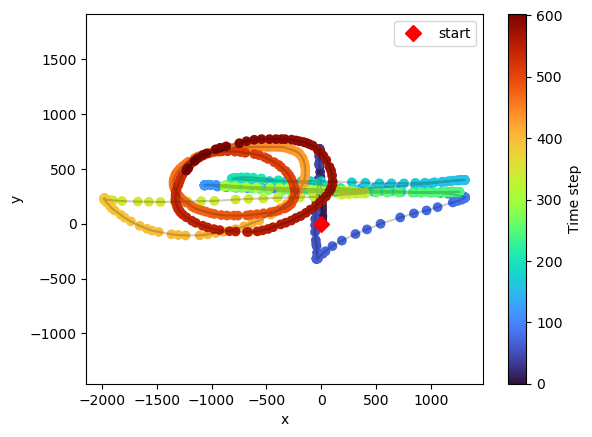

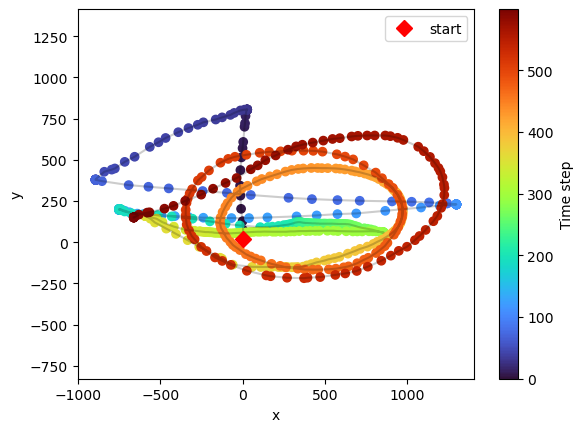

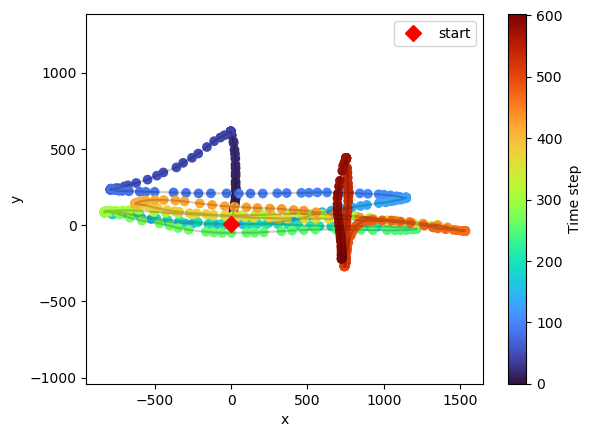

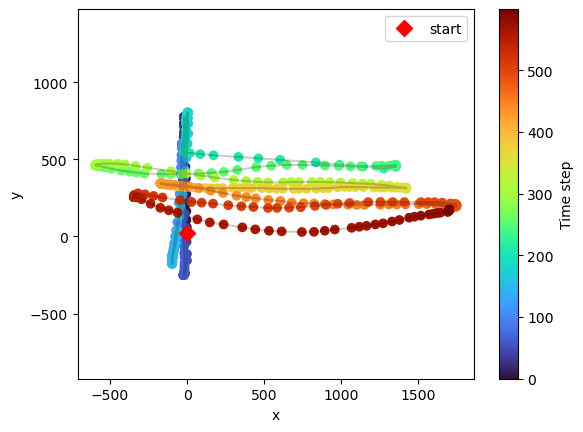

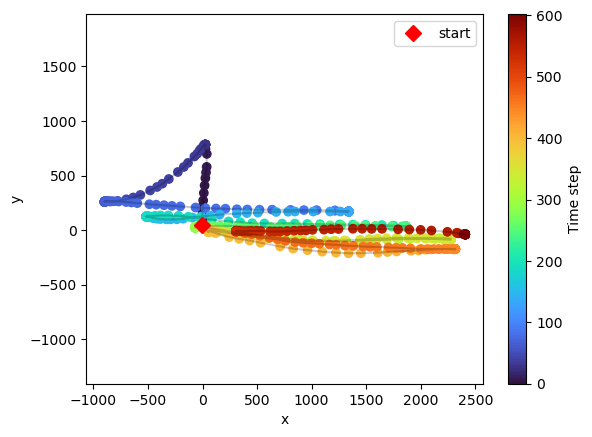

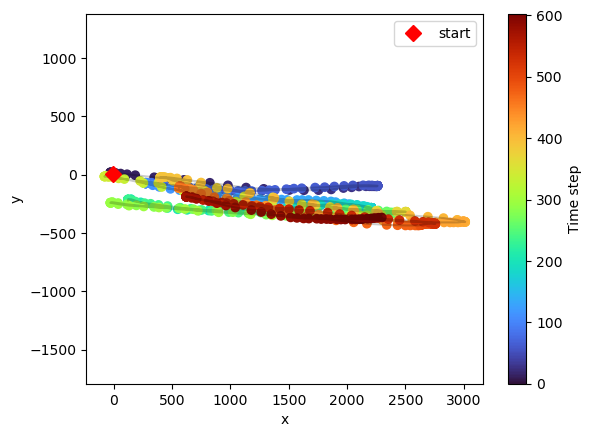

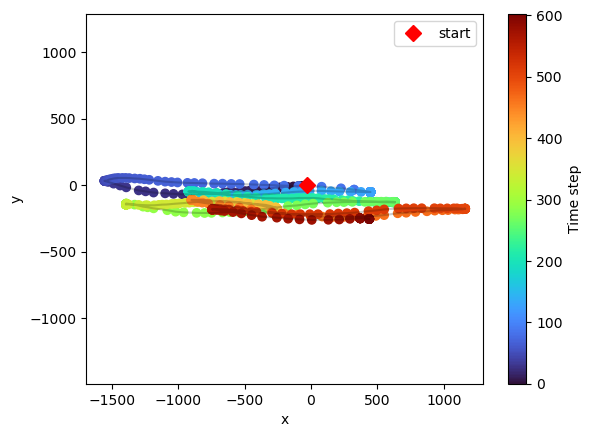

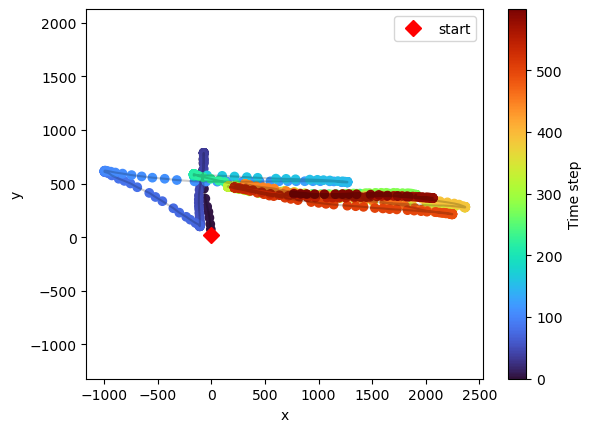

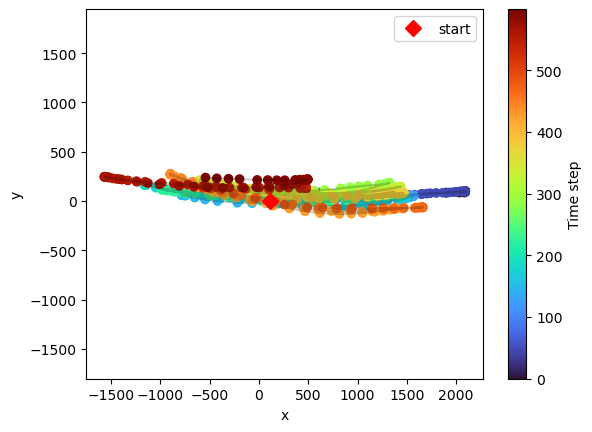

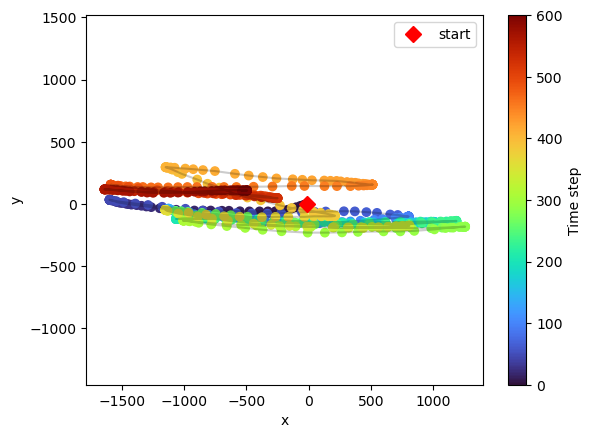

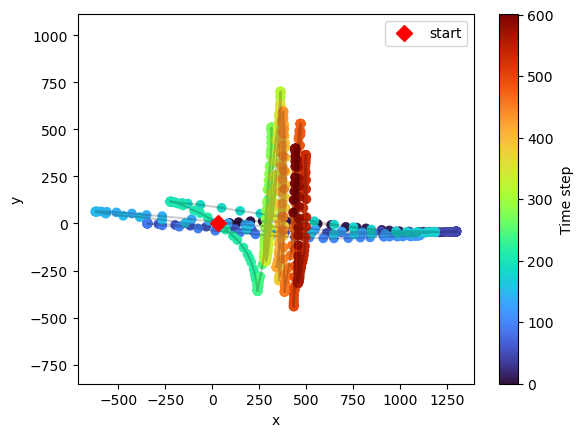

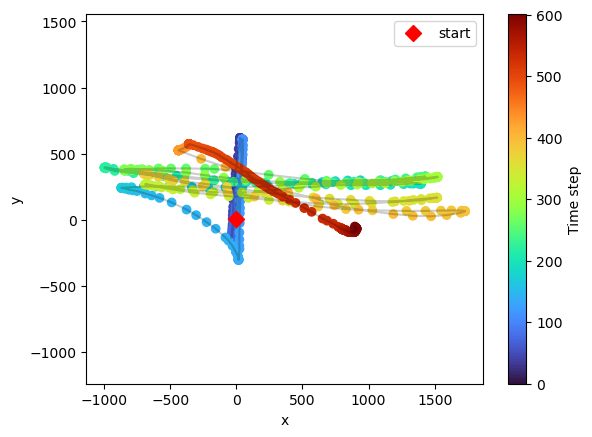

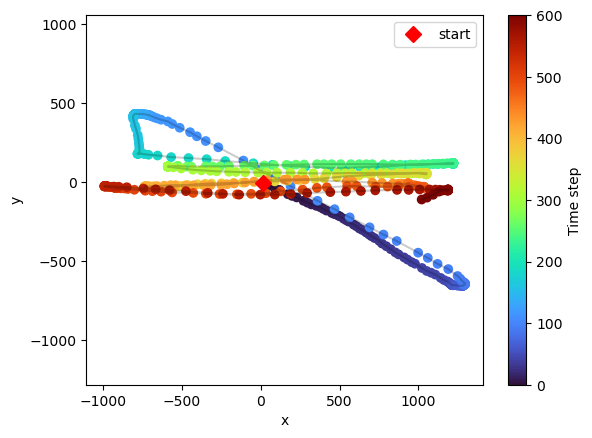

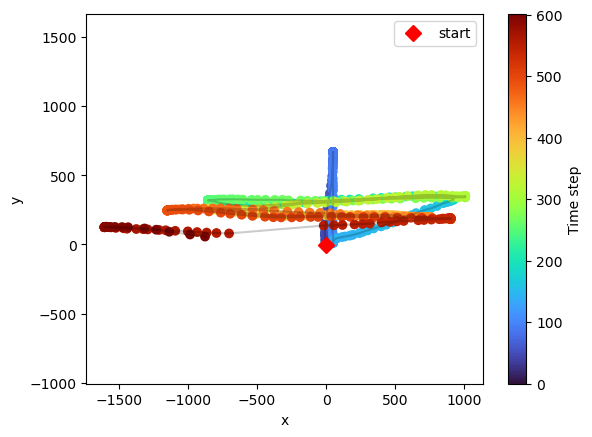

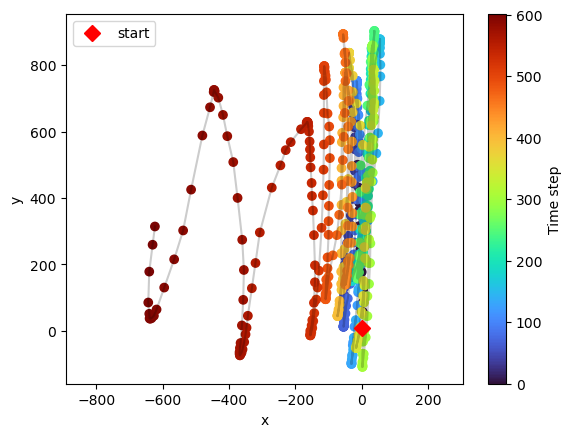

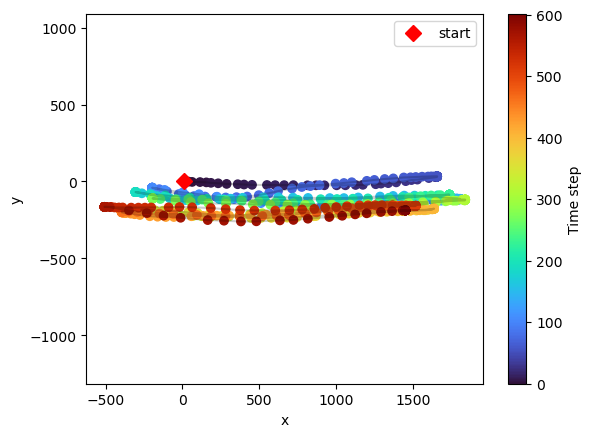

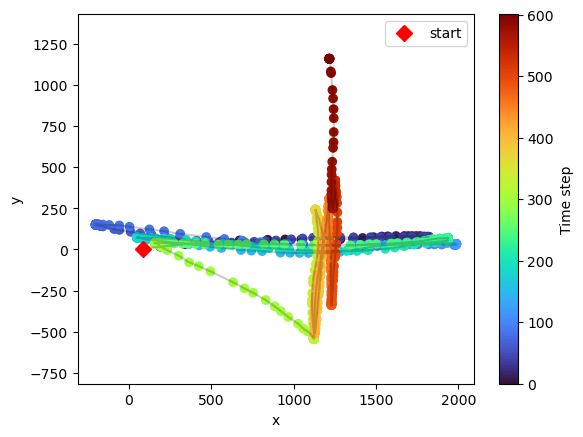

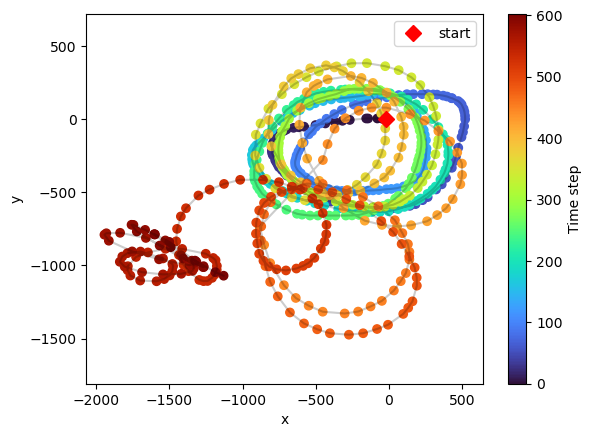

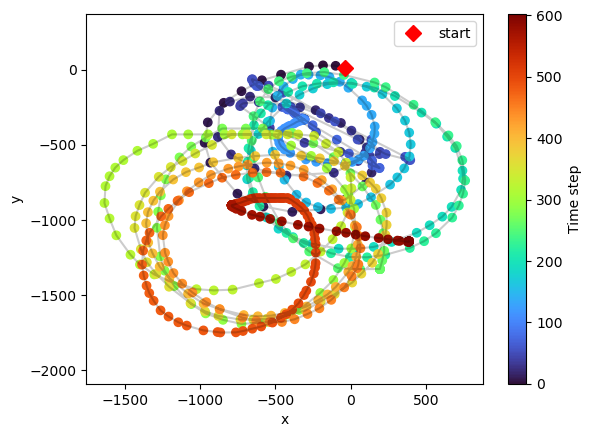

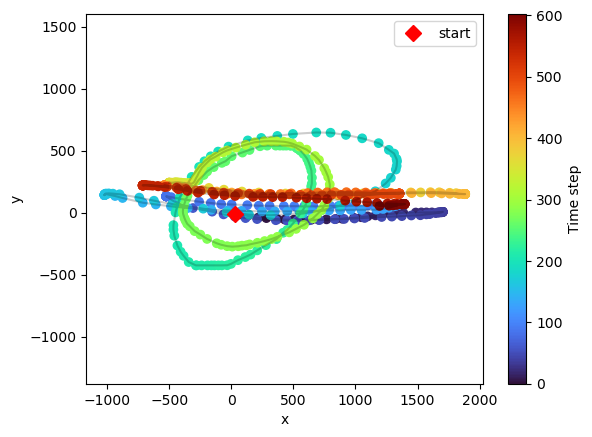

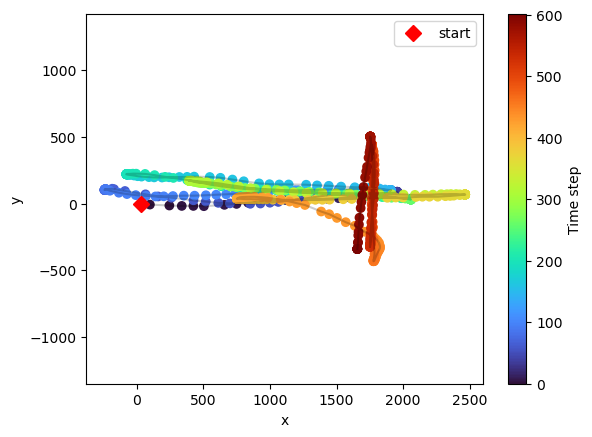

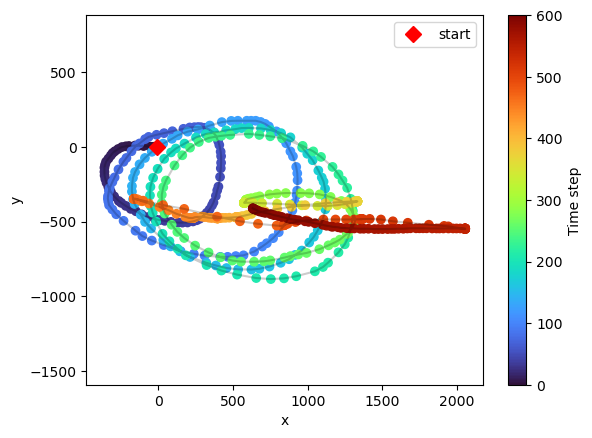

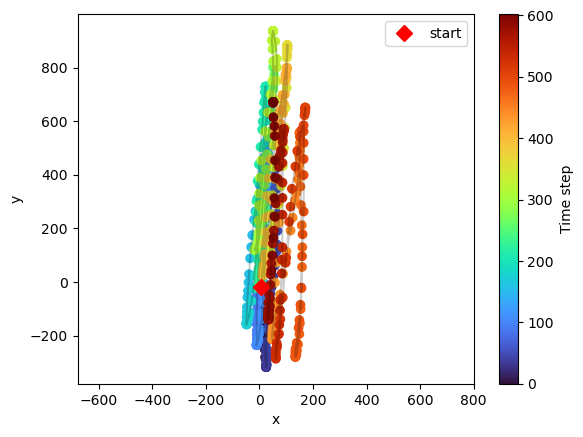

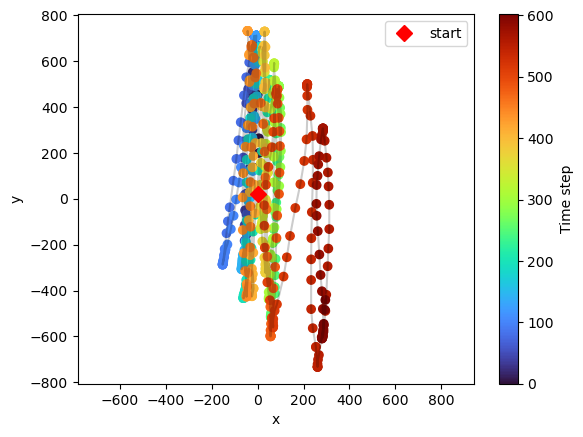

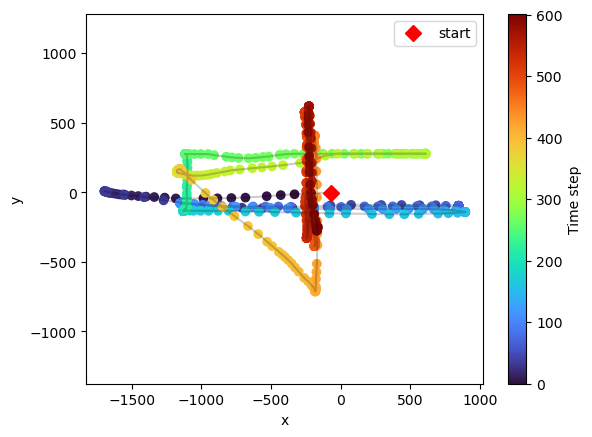

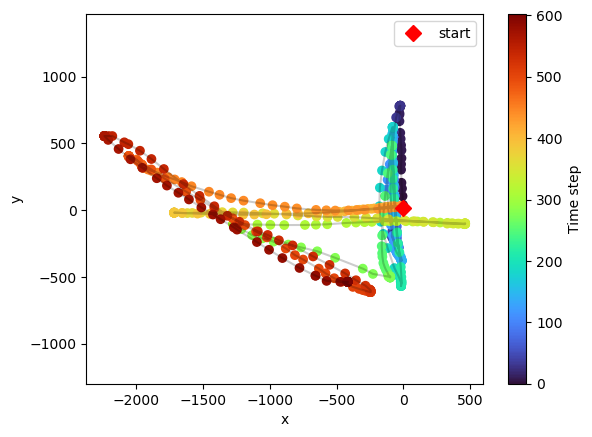

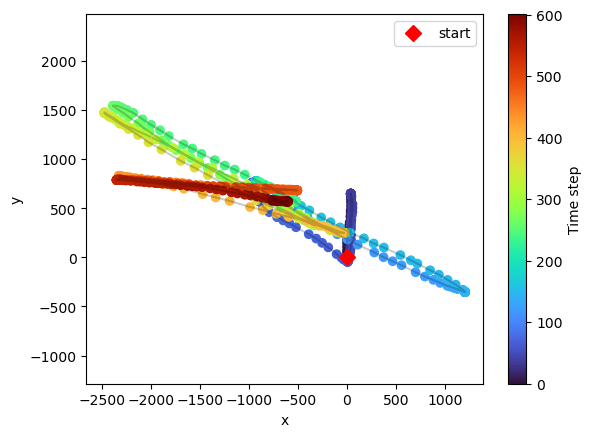

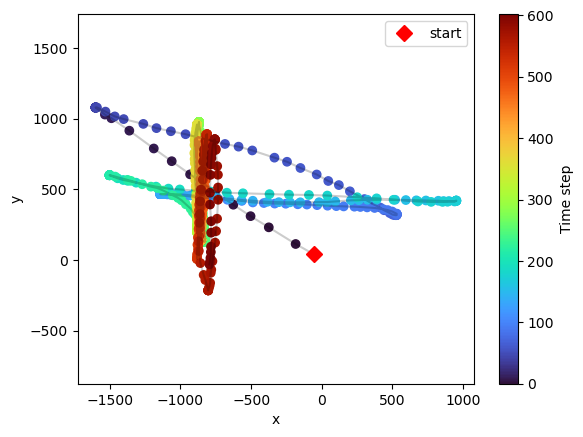

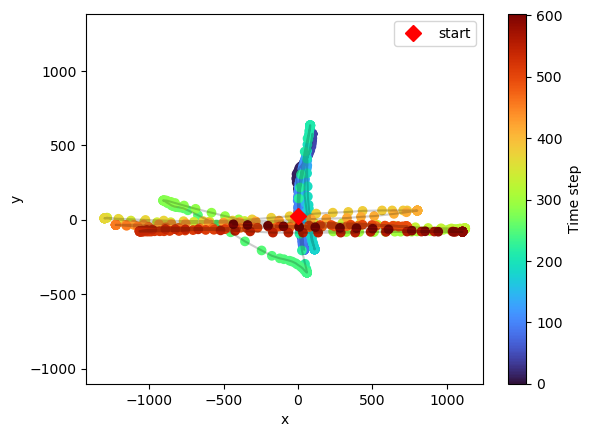

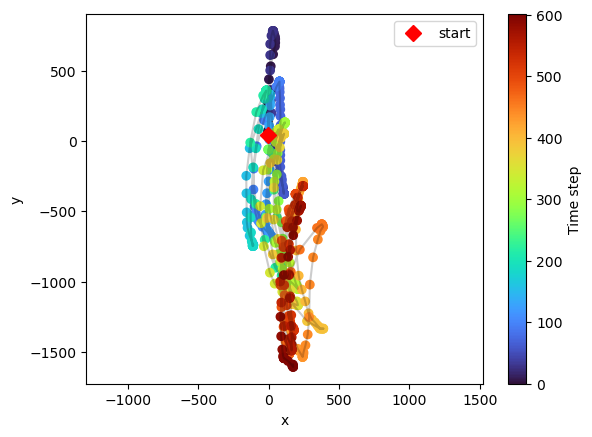

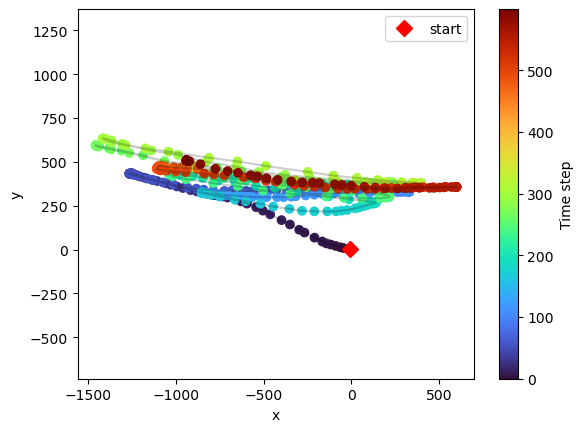

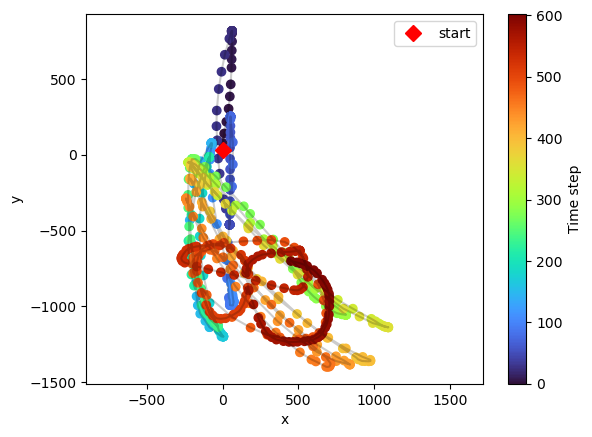

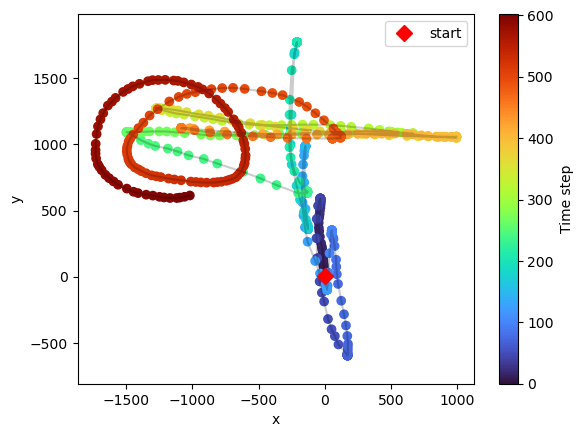

In [21]:
# get the number of trials
num_trials = df['trial'].nunique()
# calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 4))  # adjust figsize as needed

# for each trial, plot the trajectory
for i, (name, group) in enumerate(df.groupby('trial')):
    row = i // num_cols
    col = i % num_cols
    x = group[['x']].values
    y = group[['y']].values
    traj_withColour(x, y, ax=axs[row, col])

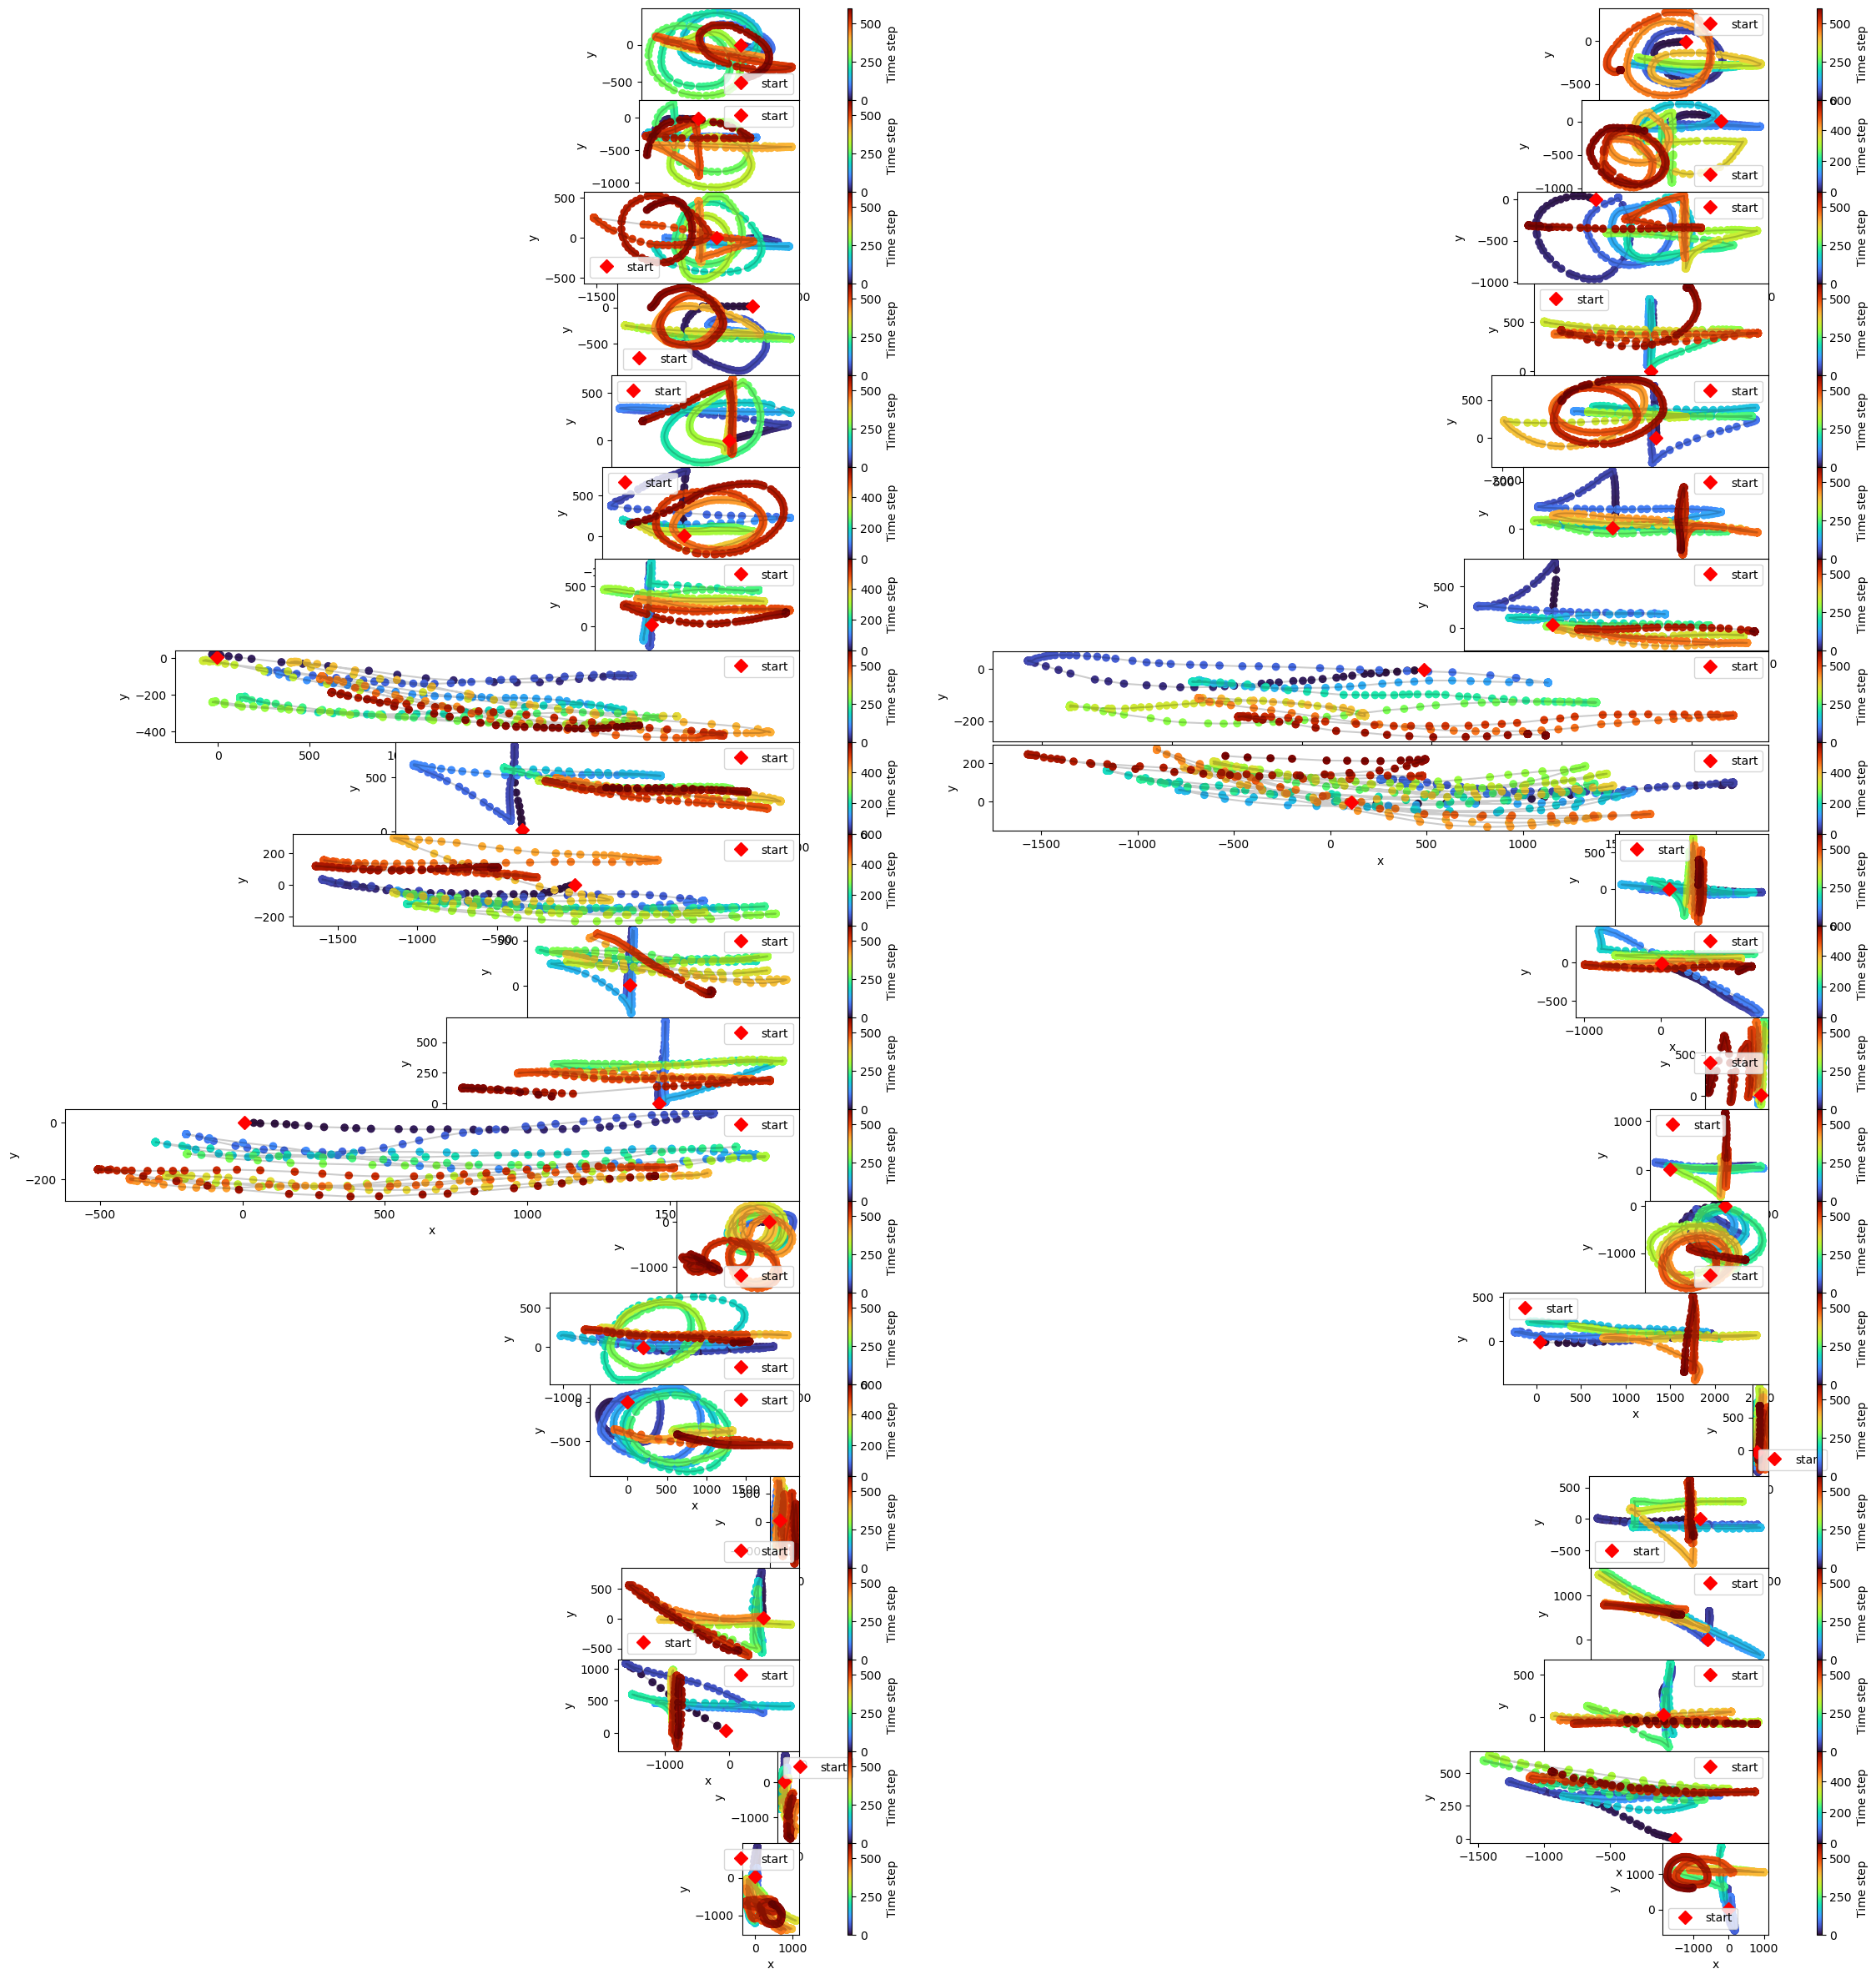

In [43]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def traj_withColour(x, y, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.legend()
    return fig, ax

# Get the number of trials
num_trials = df['trial'].nunique()

# Calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# Create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30), gridspec_kw={'hspace': 0, 'wspace': 0})

# For each trial, plot the trajectory
for i, (name, group) in enumerate(df.groupby('trial')):
    row = i // num_cols
    col = i % num_cols
    x = group['x'].values  # Corrected column selection
    y = group['y'].values  # Corrected column selection
    traj_withColour(x, y, fig=fig, ax=axs[row, col])

# Show the plot
plt.tight_layout()
plt.show()


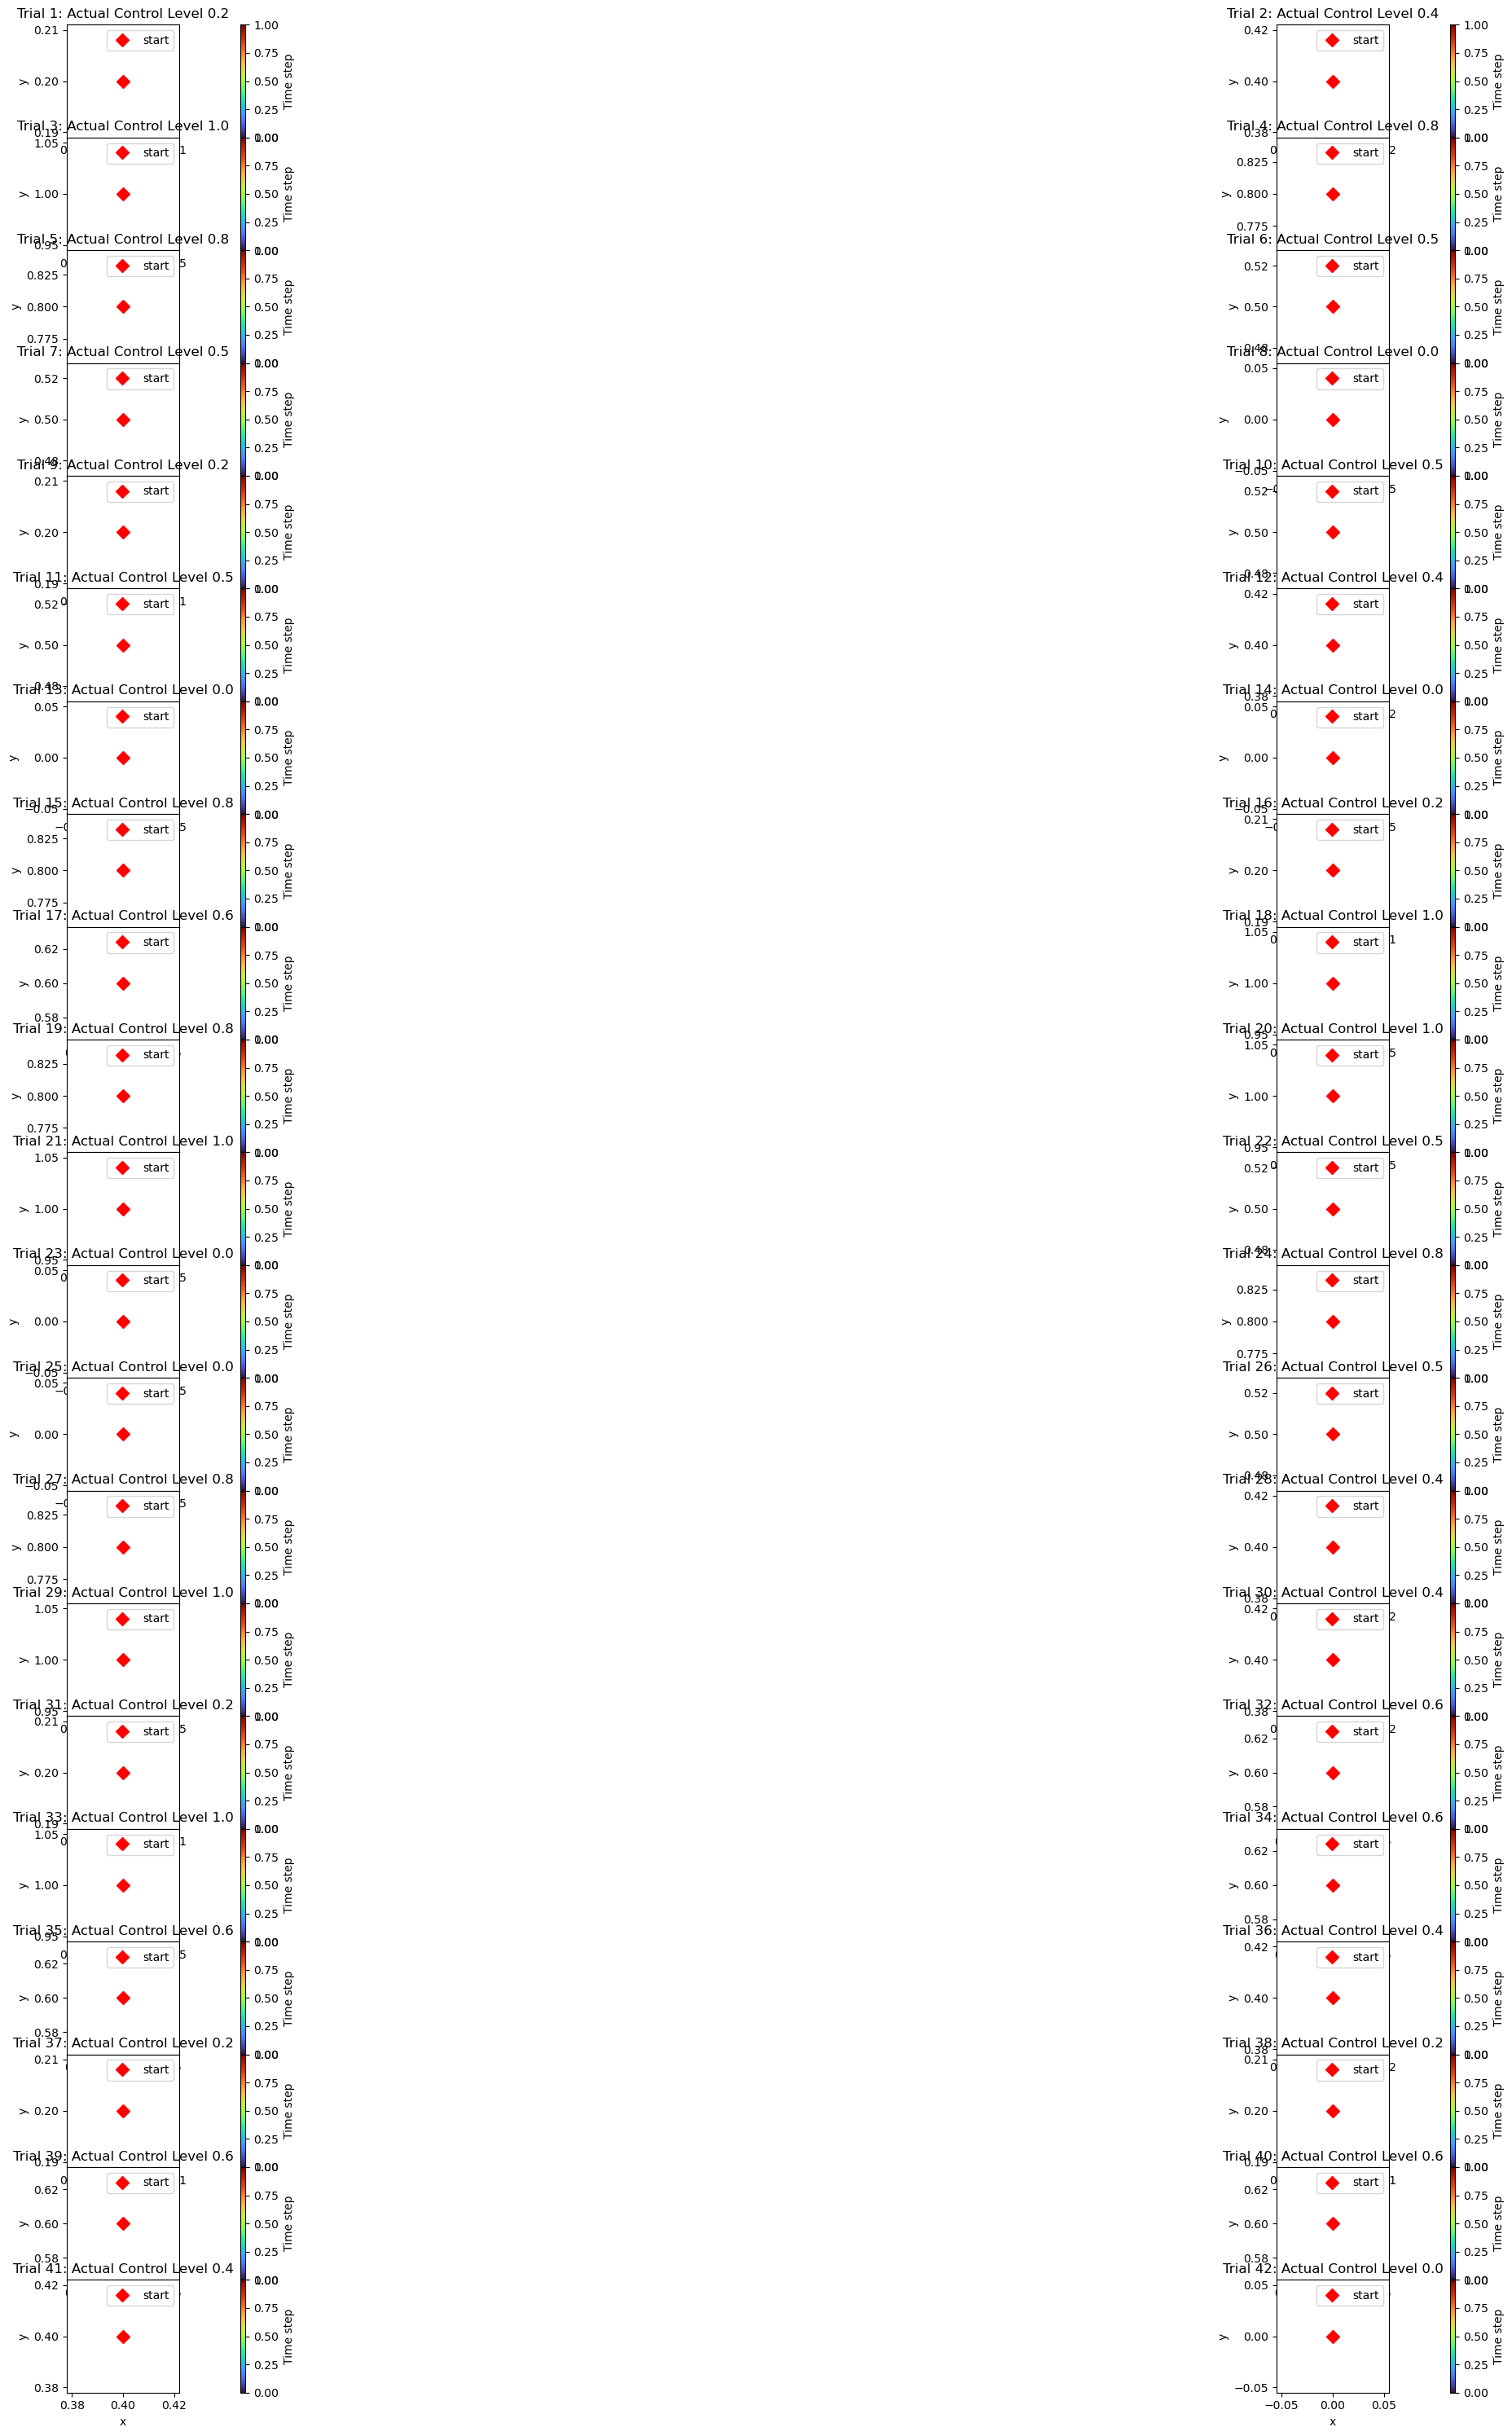

In [53]:
import pandas as pd

# 
df = pd.read_csv('sample data 2/1_19-Oct-2019_10-18-23_results.csv')

# "actual control"を抽出します
actual_control = df['actual control']

def traj_withColour(x, y, actual_control, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    colors = np.linspace(0, 1, len(x))
    ax.plot(x, y, '-k', alpha=0.2)
    ax.scatter(x, y, c=colors, cmap='turbo')
    ax.plot(x[0], y[0], 'Dr', label='start', markersize=8)
    norm = mpl.colors.Normalize(vmin=0, vmax=len(x))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap='turbo', norm=norm), ax=ax)
    cbar.set_label('Time step')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.set_title(f'Trial {name}: Actual Control Level {actual_control}')  # Add title with actual control level
    ax.legend()
    return fig, ax

# Get the number of trials
num_trials = df['trial no.'].nunique()

# Calculate the number of rows and columns for the subplots
num_rows = num_trials // 2
num_cols = 2
if num_trials % 2 > 0:
    num_rows += 1

# Create a subplot for each trial
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30), gridspec_kw={'hspace': 0, 'wspace': 0})

# For each trial, plot the trajectory
for i, (name, group) in enumerate(df.groupby('trial no.')):
    row = i // num_cols
    col = i % num_cols
    x = group['actual control'].values  # Corrected column selection
    y = group['actual control'].values  # Corrected column selection
    actual_control = group['actual control'].values[0]  # Get the actual control level for this trial
    traj_withColour(x, y, actual_control, fig=fig, ax=axs[row, col])
    # Show the plot
plt.tight_layout()
plt.show()

In [47]:
print(df.columns)

Index(['participant', 'trial no.', 'actual control', 'target ID', 'rt',
       'response', 'accuracy'],
      dtype='object')
